___

<a href='https://www.eeoc.gov/data/job-patterns-minorities-and-women-private-industry-eeo-1-0'><img src='eeoc_logo.png'/></a>
___

<center><em>ISDS 577 Capstone Project</em></center>
<center><em>For more information, visit <a href='https://www.eeoc.gov/data/job-patterns-minorities-and-women-private-industry-eeo-1-0'>www.eeoc.gov</a></em></center>

# EEO Dataset Inspection

About this dataset:



    Format
    
    - 949346 rows and 10 columns containing categorical and continuous variables.
    - Records are from 2016 to 2021.


    Details
    
    - All records have complete data; meaning each record has values for each variable.
    - There are 10 different jobs. The titles are ambiguous and allude to a wide range of positions/salaries.
    - There are many states in the US that have the same 'County' name (ex: Orange County in NY, FL, CA...).
    - There are significantly more records for 2021 in comparison to previous years.
   
    
    Source
    
    - https://www.eeoc.gov/data/job-patterns-minorities-and-women-private-industry-eeo-1-0

## Imports

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## CSV

In [20]:
eeo = pd.read_csv('../EEOC_V3.csv', low_memory=False)

## Obtaining Basic Information About EEO

In [21]:
eeo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949346 entries, 0 to 949345
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Year                949346 non-null  int64 
 1   County              949346 non-null  object
 2   State               949346 non-null  object
 3   Region              949346 non-null  object
 4   Division            949346 non-null  object
 5   Race                949346 non-null  object
 6   Gender              949346 non-null  object
 7   Industry            949346 non-null  object
 8   Job                 949346 non-null  object
 9   Number of Employee  949346 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 72.4+ MB


In [22]:
eeo

,Year,County,State,Region,Division,Race,Gender,Industry,Job,Number of Employee
0,2021,Yakima,Washington,West,Pacific,White,Male,Health Care and Social Assistance,Service,118
1,2021,Arapahoe,Colorado,West,Mountain,TwoormoreRaces,Female,Administrative and Support and Waste Managemen...,Craft,3
2,2021,Hamilton,Ohio,Midwest,East North Central,TwoormoreRaces,Female,Health Care and Social Assistance,Craft,9
3,2021,Kent,Michigan,Midwest,East North Central,TwoormoreRaces,Female,Manufacturing,Craft,6
4,2021,Wayne,Michigan,Midwest,East North Central,TwoormoreRaces,Female,Manufacturing,Craft,3
...,...,...,...,...,...,...,...,...,...,...
949341,2016,St. Joseph,Indiana,Midwest,East North Central,White,Male,Finance and Insurance,MidOffandManagers,76
949342,2016,St. Joseph,Indiana,Midwest,East North Central,White,Male,Accommodation and Food Services,MidOffandManagers,71
949343,2016,St. Joseph,Indiana,Midwest,East North Central,White,Male,Other Services (except Public Administration),MidOffandManagers,40
949344,2016,Vigo,Indiana,Midwest,East North Central,White,Male,Manufacturing,MidOffandManagers,144


## Data entries for each column (%)

Comments:

- All of the records have complete data from each column.
- Previous dataset had 'Not Reported'; there are none here. 

In [23]:
perc_complete = round((eeo.notnull().sum() / len(eeo)), 3)
perc_complete.sort_values(ascending=False)

Year                  1.0
County                1.0
State                 1.0
Region                1.0
Division              1.0
Race                  1.0
Gender                1.0
Industry              1.0
Job                   1.0
Number of Employee    1.0
dtype: float64

**Create function to check whether or not a Series contains any 'Not Reported' values.**

In [24]:
def non_report_check(x):
    '''Checks for a 'Not Reported' value.'''
    if x == 'Not Reported':
        return True
    else:
        return False

In [25]:
eeo.applymap(non_report_check).sum().sort_values(ascending=False)
# Race, Sex, and Job all have 30767 records containing 'Not Reported'

Year                  0
County                0
State                 0
Region                0
Division              0
Race                  0
Gender                0
Industry              0
Job                   0
Number of Employee    0
dtype: int64

## Inspecting each column 
We want to insure that the data accurately depicts US naming standards and contains enough information to proceed with our analyses.

#### Year

In [26]:
eeo

,Year,County,State,Region,Division,Race,Gender,Industry,Job,Number of Employee
0,2021,Yakima,Washington,West,Pacific,White,Male,Health Care and Social Assistance,Service,118
1,2021,Arapahoe,Colorado,West,Mountain,TwoormoreRaces,Female,Administrative and Support and Waste Managemen...,Craft,3
2,2021,Hamilton,Ohio,Midwest,East North Central,TwoormoreRaces,Female,Health Care and Social Assistance,Craft,9
3,2021,Kent,Michigan,Midwest,East North Central,TwoormoreRaces,Female,Manufacturing,Craft,6
4,2021,Wayne,Michigan,Midwest,East North Central,TwoormoreRaces,Female,Manufacturing,Craft,3
...,...,...,...,...,...,...,...,...,...,...
949341,2016,St. Joseph,Indiana,Midwest,East North Central,White,Male,Finance and Insurance,MidOffandManagers,76
949342,2016,St. Joseph,Indiana,Midwest,East North Central,White,Male,Accommodation and Food Services,MidOffandManagers,71
949343,2016,St. Joseph,Indiana,Midwest,East North Central,White,Male,Other Services (except Public Administration),MidOffandManagers,40
949344,2016,Vigo,Indiana,Midwest,East North Central,White,Male,Manufacturing,MidOffandManagers,144


Text(0, 0.5, 'Records')

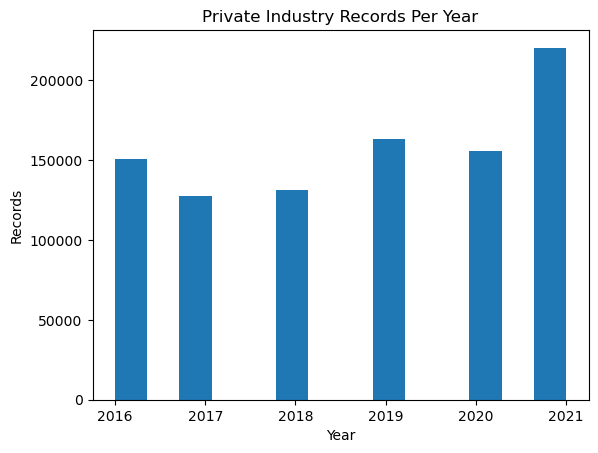

In [27]:
plt.hist(eeo['Year'], 14)
plt.title('Private Industry Records Per Year')
plt.xlabel('Year')
plt.ylabel('Records')

# Data contains records from 2016 to 2021
# 2021 has the most records with a significant margin between 2021 and 2020. Did more companies choose to report post-COVID?

#### Region, Division, State, County, and Region
Comments:
- 'Region' is inaccurate according to the 5 offical regions reported by the US Census Bureau. The Southwest and the Southeast are combined into the South.
- The South region has the most data (perhaps because it's two regions combined) with a significant margin. The Northeast and Midwest regions have the least.
- The South Atlantic division has the most reports followed by the Pacific division.
- 'State' has 51 values and includes Disctrict of Columbia.
- CA has the most records with 144,009. Big enough to perform statistical analysis on this state alone.
- 'Counties' represents 38.13% of the counties in the United States.
- Orange County has the most records in the US. There are multiple counties in the US named 'Orange County'.

#### Region

Text(0.5, 1.0, 'Number of Private Industry Records per Region in the US')

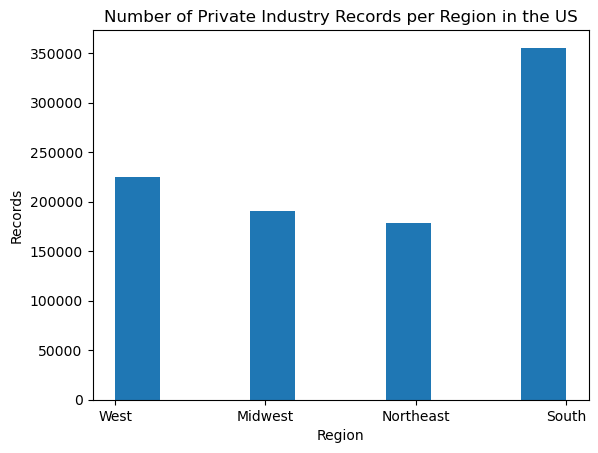

In [28]:
eeo['Region'].value_counts()

plt.hist(eeo['Region'])
plt.xlabel('Region')
plt.ylabel('Records')
plt.title('Number of Private Industry Records per Region in the US')


# This dataset has regions different from the ones listed by the US Census Bureau. Something to address with the group.

# There are 5 regions in the United States: the Northeast, the Midwest, the West, the Southwest, and the Southeast.
# https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States

#### Division

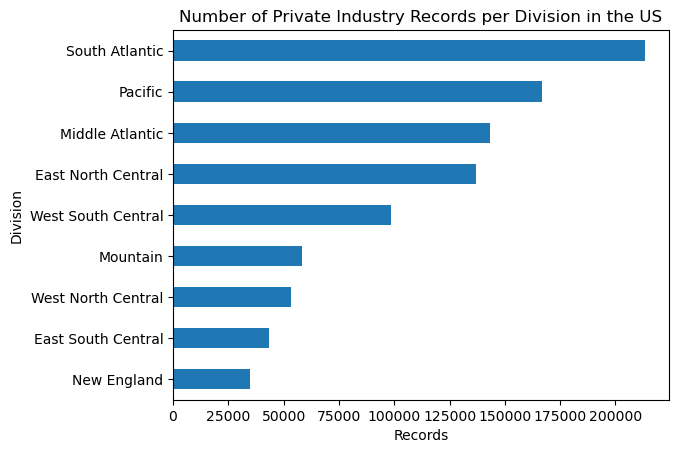

In [29]:
eeo['Division'].value_counts().plot(kind='barh')


plt.ylabel('Division')
plt.xlabel('Records')
plt.title('Number of Private Industry Records per Division in the US')
plt.gca().invert_yaxis()


# There are 9 divisions in the United States. Column is accurate.
# South Atlantic has the most reports followed by the Pacific.

#### State

In [30]:
eeo['State'].nunique()

51

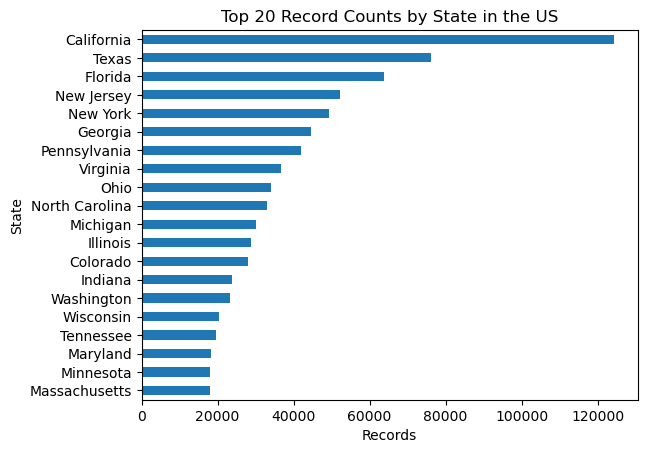

In [31]:
state_top_20 = eeo['State'].value_counts().head(20)

state_top_20.plot(kind='barh')
plt.title("Top 20 Record Counts by State in the US")
plt.xlabel("Records")
plt.gca().invert_yaxis()


# Disctrict of Columbia is included.
# California has the most records.

In [32]:
# What % of all the records will be used if we don't include District of Columbia in our research?

# Dropping District of Columbia will have no siginifant effect on our research.
round((eeo['State'].count() - len(eeo[eeo['State'] == 'District of Columbia'])) / len(eeo), 4)

0.997

#### County

Comments: 

- There are many counties with the same name in several states. 
- Consider attaching zip codes to create unique identifiers (will be used to merge salary data) or by unique geolocation combination (explore further).

In [33]:
eeo['County'].nunique()
# There are 3244 counties in the US: https://en.wikipedia.org/wiki/List_of_United_States_counties_and_county_equivalents

1237

Text(0.5, 1.0, 'Top 15 Records Counts per County in the US')

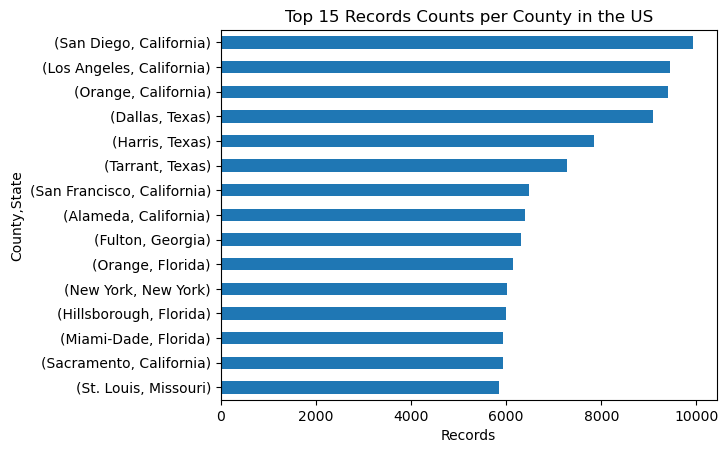

In [34]:
eeo[['County', 'State']].value_counts().head(15).plot(kind='barh')
plt.gca().invert_yaxis()
plt.xlabel('Records')
plt.title("Top 15 Records Counts per County in the US")

# Is there a correlation between the wealth of county and number of records reported?

#### County can appear more than once.

Comments:

- County and State are 1:M.
- Orange County is used as an example.

In [35]:
counties = eeo.copy()
orange_county = counties.set_index('County').loc['Orange']
orange_county = orange_county.reset_index()


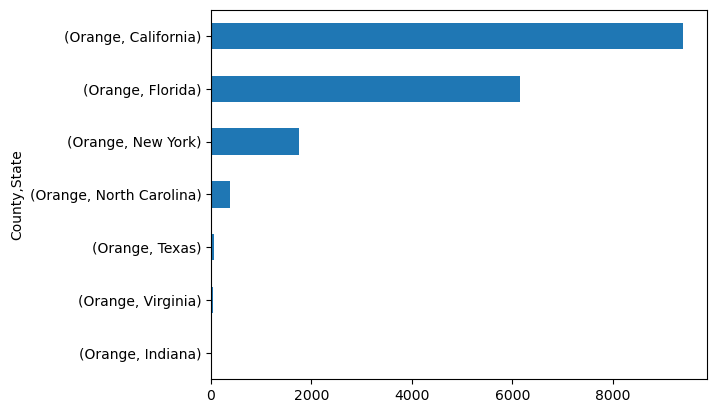

In [36]:
orange_county[['County', 'State']].value_counts().plot(kind='barh')
plt.gca().invert_yaxis()
# Orange County appears in multiple states. 

#### Sector 

Comments:

- Manufacturing and Retail Trade have the most records, followed by Health Care. Public Admin has the least (outlier).


Text(0.5, 1.0, 'Top 10 Industries by Record Count')

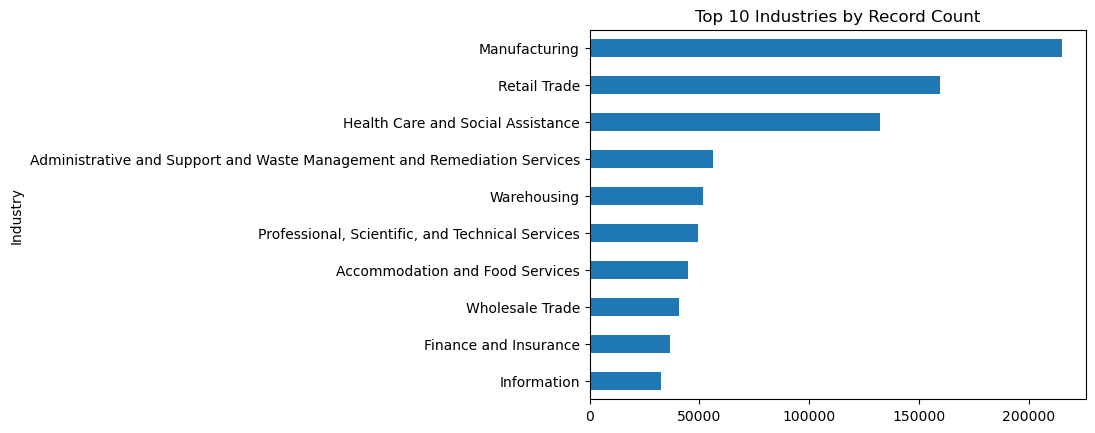

In [37]:
eeo['Industry'].value_counts().head(10).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 10 Industries by Record Count")


#### Race, Sex, and Job 

Comments:
- **Native Indians and Pacific Islander** records are noticeably small; clear outliers here.
- Gender has equal records.


#### Race

In [38]:
round(eeo['Race'].value_counts() / eeo['Race'].value_counts().sum(), 4)

Race
White                                   0.2858
Hispanic                                0.2363
BlackorAfricanAmerican                  0.2293
Asian                                   0.1277
TwoormoreRaces                          0.0916
AmericanIndianorAlaskaNative            0.0150
NativeHawaiianorOtherPacificIslander    0.0143
Name: count, dtype: float64

#### Sex

In [39]:
eeo['Gender'].value_counts()

Gender
Male      474673
Female    474673
Name: count, dtype: int64

#### Job


In [40]:
eeo['Job'].value_counts()
# Jobs is ambiguous and alludes to a wide range of positions/salaries. 
# How accurate can our data be in analyzing wage disparities if we use salaries that don't accurately depict workers?

Job
Professionals           163052
Clericals               148064
MidOffandManagers       140466
Operatives              119286
Labors                  114816
Service                  90052
Technicians              74138
SalesWorkers             67448
Craft                    22588
SeniorOffandManagers      9436
Name: count, dtype: int64

#### Sex and Job

Comments: Evenly distributed among genders.

In [41]:
# Distribution between males and females for every Job
eeo[['Job', 'Gender']].value_counts()

Job                   Gender
Professionals         Female    81526
                      Male      81526
Clericals             Male      74032
                      Female    74032
MidOffandManagers     Female    70233
                      Male      70233
Operatives            Female    59643
                      Male      59643
Labors                Female    57408
                      Male      57408
Service               Female    45026
                      Male      45026
Technicians           Female    37069
                      Male      37069
SalesWorkers          Female    33724
                      Male      33724
Craft                 Male      11294
                      Female    11294
SeniorOffandManagers  Female     4718
                      Male       4718
Name: count, dtype: int64

#### Number of Employee

Comments:

- Refers to the number of employees that fill a demographic (ex: 7 employees are Professionals, Black, Female, CA...)
- We can't make inferences on the # employees yet since we don't have unique identifiers.


In [42]:
round((eeo['Number of Employee'].describe()), 2)

# Does not really tell us much since the same location can contain multiple Employee Number records (for this dataset).

count    949346.00
mean        173.20
std         706.46
min           3.00
25%          11.00
50%          32.00
75%         106.00
max       48286.00
Name: Number of Employee, dtype: float64